##### The latest version of this Jupyter notebook is available at [http://github.com/jckantor/CBE40455](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Geometric Brownian Price Process

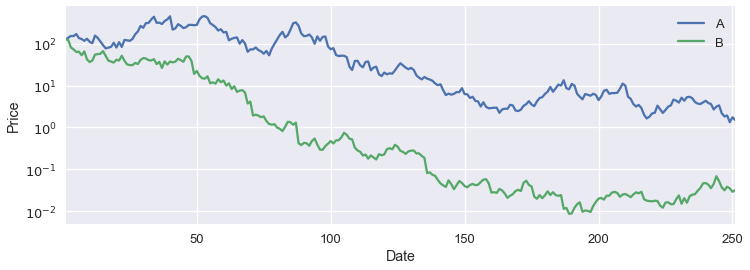

In [1]:
%matplotlib inline
import random 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import simpy
import seaborn as sns
sns.set_context('talk')

class gbm(object):
    def __init__(self, env, name, tick=1.0, P=100.0, mu=0.01, sigma=0.10):
        self.env = env
        self.name = name
        self.tick = tick
        self.t = 0
        self.P = P
        self.hist = pd.Series()
        self.mu = mu
        self.sigma = sigma
        self.proc = env.process(self.run())
        
    def plot(self):
        self.hist.plot(logy=True,label=self.name)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend(loc='best')
        
    def run(self):
        while True:
            yield env.timeout(self.tick)
            self.t += self.tick
            self.P += self.P*(self.mu*self.tick + \
                    self.sigma*random.normalvariate(0,1)*np.sqrt(self.tick))
            self.hist.set_value(self.t,self.P)
    
# create the simulation environment
env = simpy.Environment()

# add the clock process to the environment. Set the tick interval.
a = gbm(env, "A", tick=1.0, mu=0.01, sigma=0.2)
b = gbm(env, "B", tick=1.0, mu=0.01, sigma=0.2)

# run the simulation for a fixed period of time
env.run(until=252.0)

plt.figure(figsize=(12,4))
a.plot()
b.plot()